In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas_datareader
import pandas_datareader as data




In [18]:
!pip install yfinance
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'
df=yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [18]:
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.757660,68.818186,67.878820,67.917557,98572000
2019-12-24,68.823021,68.973132,68.496186,68.924708,48478800
2019-12-26,70.188499,70.205449,68.927137,68.956189,93121200
2019-12-27,70.161873,71.171452,69.755139,70.481453,146266000
2019-12-30,70.578300,70.861566,69.053045,70.079566,144114400


In [20]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
1,2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2,2010-01-06,6.348848,6.477047,6.342227,6.451467,552160000
3,2010-01-07,6.337109,6.379843,6.291066,6.372319,477131200
4,2010-01-08,6.379239,6.379841,6.291367,6.328682,447610800


In [32]:
df=df.drop(['Date'],axis=1)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451466,6.487879,6.417460,6.458087,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337109,6.379843,6.291066,6.372319,477131200
4,6.379239,6.379841,6.291367,6.328682,447610800


In [30]:
print(df.columns)



MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


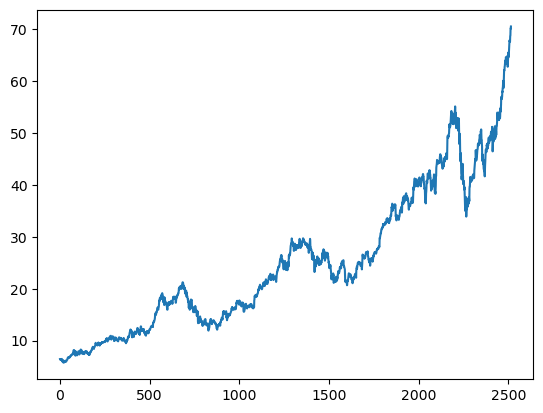

In [34]:
plt.plot(df.Close)

In [36]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451466,6.487879,6.417460,6.458087,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337109,6.379843,6.291066,6.372319,477131200
4,6.379239,6.379841,6.291367,6.328682,447610800
...,...,...,...,...,...
2510,68.757660,68.818186,67.878820,67.917557,98572000
2511,68.823021,68.973132,68.496186,68.924708,48478800
2512,70.188499,70.205449,68.927137,68.956189,93121200


In [40]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212839
2511,57.410470
2512,57.647438
2513,57.875338


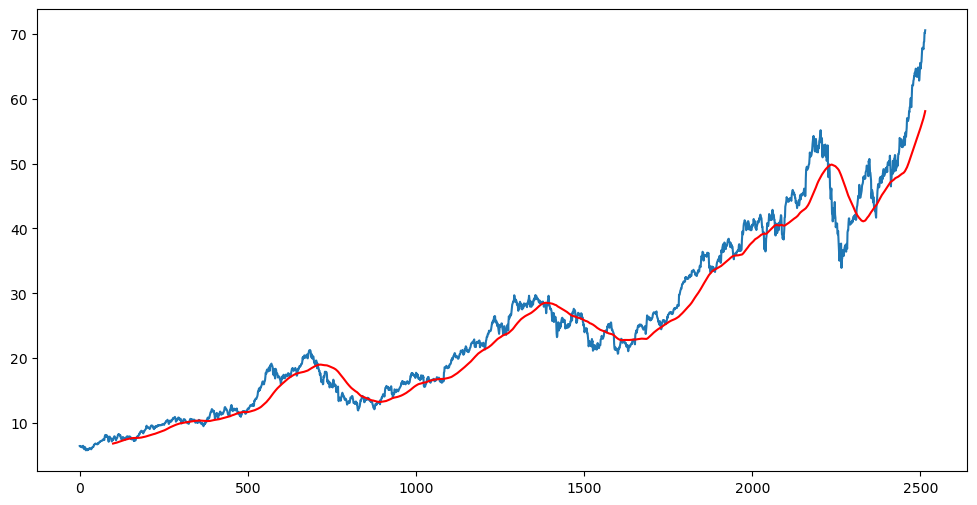

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,52.164466
2019-12-24,52.291902
2019-12-26,52.425207


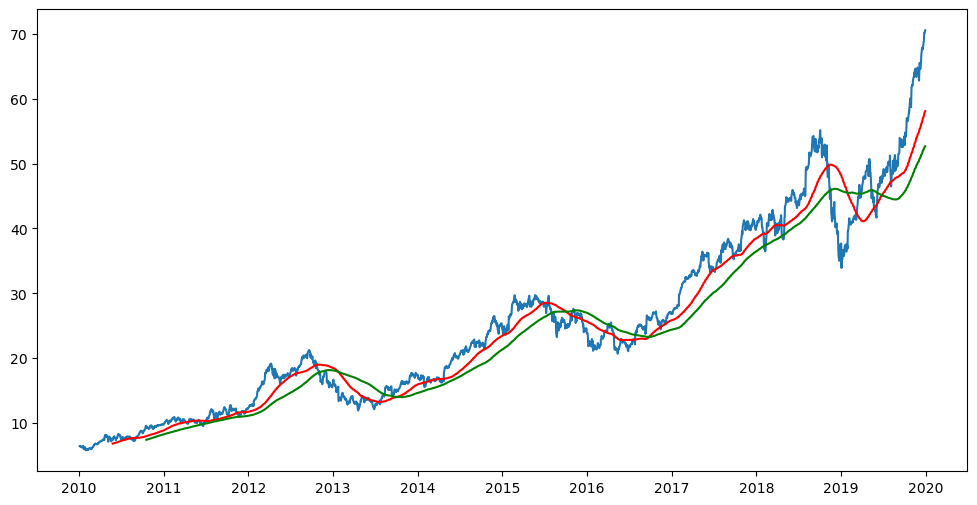

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(2515, 5)

In [20]:
#splitting data into training ad testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [17]:
data_training.head()

Ticker,AAPL
Date,
2010-01-04,6.440330
2010-01-05,6.451462
2010-01-06,6.348846
2010-01-07,6.337110
2010-01-08,6.379240


In [19]:
data_testing.head()

Ticker,AAPL
Date,
2016-12-29,26.996563
2016-12-30,26.786108
2017-01-03,26.862423
2017-01-04,26.832359
2017-01-05,26.968813


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02759997],
       [0.02806502],
       [0.0237792 ],
       ...,
       [0.88408439],
       [0.89123201],
       [0.88640246]])

In [30]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    y_train.append(data_training_array[i,0])
    x_train.append(data_training_array[i-100:i])

x_train, y_train=np.array(x_train), np.array(y_train)

In [ ]:
#ml model

In [40]:
!pip install tensorflow
!pip install keras
from keras.layers import Input, Dense, Dropout, LSTM
from keras.models import Sequential

In [42]:

# Define the model
model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))

# Add the first LSTM layer with input shape
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the third LSTM layer
model.add(LSTM(units=80, activation='relu'))
model.add(Dropout(0.4))

# Add the output Dense layer
model.add(Dense(units=1))




In [46]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 80)             │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,241 (321.25 KB)

 Trainable params: 82,241 (321.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - loss: 0.1528
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0141
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 0.0095
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0101
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 0.0094
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0080
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 0.0088
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0078
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 0.0072
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0065
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 0.0068
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0061
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0061
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - loss: 0.0065
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step -

In [52]:
model.save('keras_model.h5')

In [54]:
data_testing.head()

Ticker,AAPL
Date,
2016-12-29,26.996561
2016-12-30,26.786102
2017-01-03,26.862425
2017-01-04,26.832361
2017-01-05,26.968817


In [56]:
past_100_days=data_training.tail(100)

In [60]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [62]:
final_df.head()

Ticker,AAPL
0,24.935099
1,25.036337
2,24.849958
3,24.833860
4,24.891376


In [68]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02573569],
       [0.02789664],
       [0.02391835],
       [0.02357474],
       [0.02480243],
       [0.03118733],
       [0.03069613],
       [0.02991026],
       [0.0292227 ],
       [0.03059789],
       [0.02642308],
       [0.02809316],
       [0.02406573],
       [0.02180662],
       [0.01871241],
       [0.01812301],
       [0.01409574],
       [0.01458682],
       [0.01768087],
       [0.02259238],
       [0.02244492],
       [0.02568643],
       [0.01173819],
       [0.        ],
       [0.01134531],
       [0.02367273],
       [0.04243424],
       [0.06109747],
       [0.05790514],
       [0.05132375],
       [0.05127465],
       [0.05117654],
       [0.05643174],
       [0.04705099],
       [0.04788601],
       [0.04891726],
       [0.05314105],
       [0.04444789],
       [0.04872082],
       [0.04611785],
       [0.04847524],
       [0.04872082],
       [0.05284633],
       [0.05368123],
       [0.06345494],
       [0.06468288],
       [0.06979046],
       [0.068

In [70]:
input_data.shape

(855, 1)

In [155]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

In [157]:
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(755, 100, 1)
(755, 1)


In [159]:
#Making predictions

y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [161]:
y_predicted.shape

(755, 1)

In [163]:
y_test

array([[0.06973806],
       [0.06524577],
       [0.0668749 ],
       [0.06623318],
       [0.06914586],
       [0.07556345],
       [0.08089491],
       [0.08148712],
       [0.0846466 ],
       [0.08217834],
       [0.08114167],
       [0.08588076],
       [0.08583138],
       [0.08479475],
       [0.08588076],
       [0.08627555],
       [0.08573269],
       [0.09516144],
       [0.09545771],
       [0.0955071 ],
       [0.0939274 ],
       [0.0925452 ],
       [0.12907592],
       [0.12798983],
       [0.13070505],
       [0.13667826],
       [0.14279963],
       [0.14531707],
       [0.15002741],
       [0.14853981],
       [0.15434073],
       [0.16291826],
       [0.16534747],
       [0.16455435],
       [0.16638882],
       [0.1712474 ],
       [0.17328027],
       [0.17040481],
       [0.17104946],
       [0.17238789],
       [0.17268554],
       [0.18656783],
       [0.1824525 ],
       [0.18651832],
       [0.18433669],
       [0.1852287 ],
       [0.18265101],
       [0.181

In [165]:
y_predicted

array([[0.13276756],
       [0.13371024],
       [0.13451025],
       [0.13516313],
       [0.13567054],
       [0.13606358],
       [0.1364123 ],
       [0.13679138],
       [0.1372351 ],
       [0.13777202],
       [0.13838266],
       [0.13903484],
       [0.13973501],
       [0.14047223],
       [0.14122033],
       [0.14196411],
       [0.14269039],
       [0.14338145],
       [0.14409402],
       [0.14484787],
       [0.14564008],
       [0.14644466],
       [0.1472276 ],
       [0.14824273],
       [0.1495717 ],
       [0.15123059],
       [0.15322772],
       [0.15556097],
       [0.1581889 ],
       [0.16107148],
       [0.16411656],
       [0.16727734],
       [0.17055951],
       [0.17394184],
       [0.17736422],
       [0.18077798],
       [0.18416928],
       [0.18751918],
       [0.19076931],
       [0.193873  ],
       [0.19680245],
       [0.19953525],
       [0.20216706],
       [0.20469648],
       [0.20713912],
       [0.20946892],
       [0.21166694],
       [0.213

In [167]:
scaler.scale_

array([0.02134522])

In [169]:
scale_factor=1/0.02134522
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

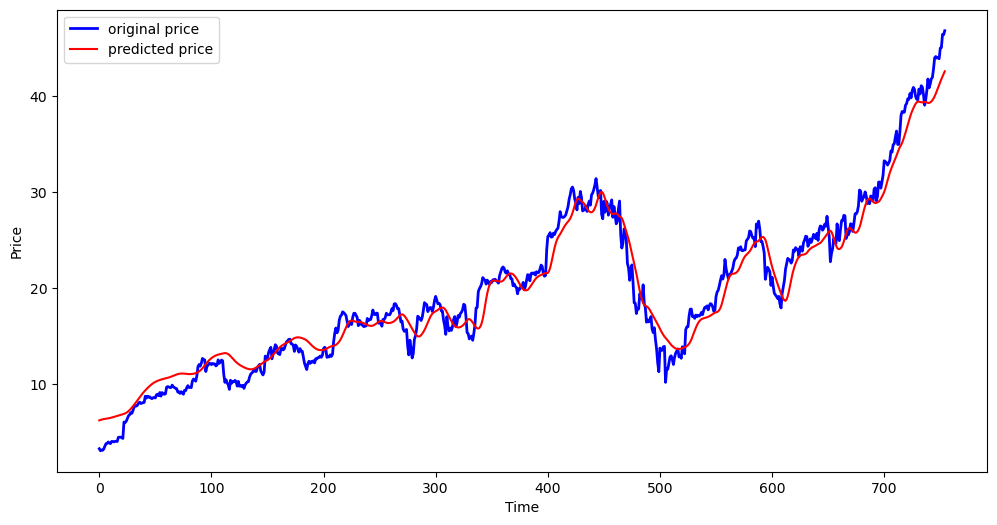

In [174]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',linewidth=2, label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [176]:
print(y_test.shape,y_predicted.shape)

(755,) (755, 1)
